<a href="https://colab.research.google.com/github/ifedolapomi/New-York-City-Airbnb/blob/main/NY_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
import kagglehub

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/kaggle.json'

In [ ]:
paths = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", paths)

Path to dataset files: /root/.cache/kagglehub/datasets/dgomonov/new-york-city-airbnb-open-data/versions/3


In [ ]:
print("Path to dataset files:", paths)

Path to dataset files: /root/.cache/kagglehub/datasets/dgomonov/new-york-city-airbnb-open-data/versions/3


In [ ]:
import pandas as pd
import os

In [ ]:
dataset_dir = "/root/.cache/kagglehub/datasets/dgomonov/new-york-city-airbnb-open-data/versions/3"

In [ ]:
# Find the CSV file within the directory
for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        dataset_path = os.path.join(dataset_dir, filename)
        break  # Stop after finding the first CSV file

# Read the CSV file into a pandas DataFrame
airbnb = pd.read_csv(dataset_path)

In [ ]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df=airbnb.isnull().sum()
df

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
airbnb.shape

(48895, 16)

In [ ]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


data cleaning

In [ ]:
clean_airbnb=airbnb.dropna(subset=['name','host_name'])
clean_airbnb.shape

(48858, 16)

In [ ]:
df=clean_airbnb.isnull().sum()
df

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
clean_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
reviews = clean_airbnb.groupby(['last_review', 'reviews_per_month']) # Group by both columns
reviews.head()  # Display the first few groups

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47888,35969545,Townhouse Apt. w/Backyard-20 min train to City!,7660014,Vanessa,Brooklyn,Bedford-Stuyvesant,40.68250,-73.91596,Entire home/apt,150,1,3,2019-06-28,3.00,1,228
48031,36041065,Large bedroom with private bathroom is suit,225118276,Alex And Mila,Brooklyn,Bedford-Stuyvesant,40.68380,-73.92854,Private room,75,1,7,2019-07-06,7.00,1,326
48127,36101396,7 minutes away from JFK,83974928,Danica,Queens,Laurelton,40.66992,-73.74518,Private room,34,1,3,2019-07-08,3.00,1,70
48351,36209003,A homey home.,272327753,Robert,Brooklyn,Bay Ridge,40.62373,-74.02676,Entire home/apt,200,1,2,2019-07-08,2.00,1,356


In [ ]:
clean_airbnb=clean_airbnb.dropna(subset=['last_review','reviews_per_month'])
clean_airbnb.shape

(38821, 16)

In [ ]:
df=clean_airbnb.isnull().sum()
df

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
clean_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

In [ ]:
#change datatype
clean_airbnb['last_review'] = pd.to_datetime(clean_airbnb['last_review'])

<ipython-input-22-f1ad2bcd3e5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_airbnb['last_review'] = pd.to_datetime(clean_airbnb['last_review'])


In [ ]:
clean_airbnb['last_review'].dtype

dtype('<M8[ns]')

In [ ]:
#find duplicate
df=clean_airbnb.duplicated().sum()
df

0

In [ ]:
#detect and remove outliers
def remove_outlier(clean_airbnb, column):
    Q1 = clean_airbnb[column].quantile(0.25)
    Q3 = clean_airbnb[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    clean_airbnb = clean_airbnb[(clean_airbnb[column] >= lower_bound) & (clean_airbnb[column] <= upper_bound)]
    return clean_airbnb
    # Apply outlier removal for 'price', 'minimum_nights', and 'availability_365'
airbnb_clean = remove_outlier(airbnb, 'price')
airbnb_clean = remove_outlier(airbnb_clean, 'minimum_nights')
airbnb_clean = remove_outlier(airbnb_clean, 'availability_365')

# Check the shape after outlier removal
airbnb_clean.shape

(39738, 16)

In [ ]:
#unique name is column host name
clean_airbnb['name'].nunique()

38253

In [ ]:
clean_airbnb['host_name'].nunique()

9885

In [ ]:
clean_airbnb['neighbourhood'].nunique()

218

In [ ]:
clean_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


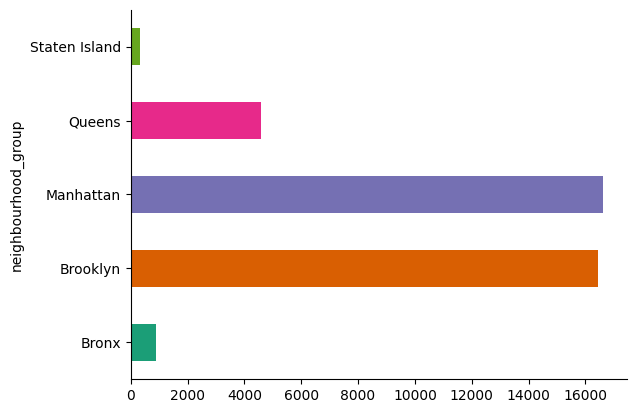

In [ ]:
# @title neighbourhood_group

from matplotlib import pyplot as plt
import seaborn as sns
clean_airbnb.groupby('neighbourhood_group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Which hosts are the busiest and why?**

key metrics are: calculated_host_listing_count
avaliablity_365

In [ ]:
host_activity=clean_airbnb.groupby('host_name').agg({'calculated_host_listings_count':'sum','availability_365':'mean'}).reset_index()
host_activity.head()


,host_name,calculated_host_listings_count,availability_365
0,'Cil,1,298.0
1,(Ari) HENRY LEE,1,56.0
2,(Email hidden by Airbnb),7,71.6
3,(Mary) Haiy,1,295.0
4,-TheQueensCornerLot,1,248.0


In [ ]:
# Find the row with the highest availability_365
highest_availability_row = host_activity.loc[host_activity['availability_365'].idxmax()]

# Display the host name and their availability
print(f"Host with highest availability: {highest_availability_row['host_name']}, availability: {highest_availability_row['availability_365']}")

Host with highest availability: Ada Azra, availability: 365.0


In [ ]:
busiest_hosts=host_activity.sort_values(by='calculated_host_listings_count',ascending=False)
busiest_hosts.head(10)

,host_name,calculated_host_listings_count,availability_365
8470,Sonder (NYC),67689,288.362319
1831,Corporate Housing,7189,241.405063
1153,Blueground,6496,271.428571
4142,Jeremy & Laura,5856,297.639344
4727,Kazuya,5253,205.921569
4607,Kara,5230,254.796610
4775,Ken,3464,242.478261
8469,Sonder,2784,287.241379
4303,John,2694,147.740000
9266,Vida,2549,296.560000


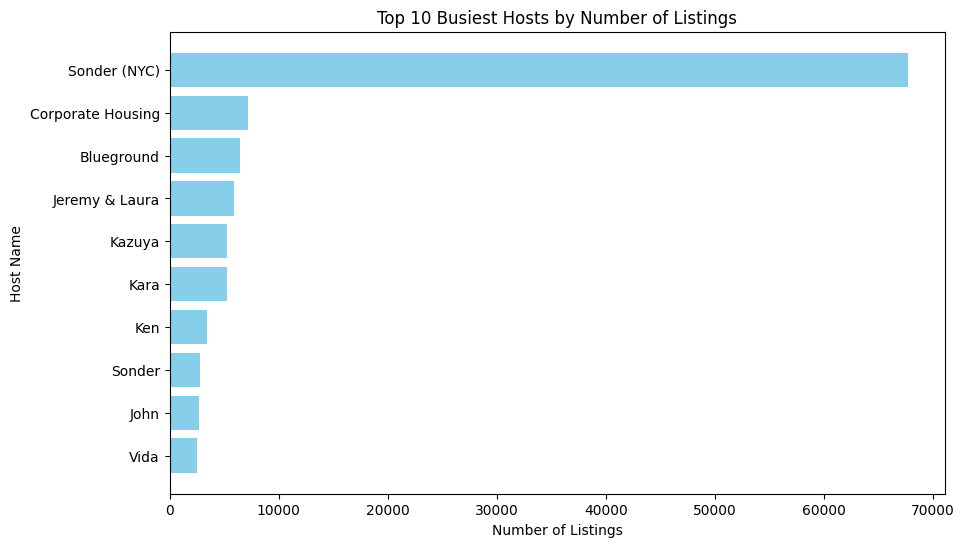

In [ ]:
top_10_busiestHost=busiest_hosts.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_busiestHost['host_name'], top_10_busiestHost['calculated_host_listings_count'], color='skyblue')
plt.xlabel('Number of Listings')
plt.ylabel('Host Name')
plt.title('Top 10 Busiest Hosts by Number of Listings')
plt.gca().invert_yaxis()  # To display the largest on top
plt.show()

**Review frequency**

In [ ]:
host_reviews=clean_airbnb.groupby('host_name').agg({'number_of_reviews':'sum', 'reviews_per_month':'mean'}).reset_index()
host_reviews.head()

,host_name,number_of_reviews,reviews_per_month
0,'Cil,240,5.220
1,(Ari) HENRY LEE,3,0.060
2,(Email hidden by Airbnb),75,0.792
3,(Mary) Haiy,188,5.810
4,-TheQueensCornerLot,51,7.430


In [ ]:
busiest_host_byreview=host_reviews.sort_values(by='number_of_reviews',ascending=False)
busiest_host_byreview.head(10)

,host_name,number_of_reviews,reviews_per_month
6168,Michael,11081,1.420358
2040,David,8103,1.645987
4303,John,7223,1.284080
3989,Jason,6522,1.569200
258,Alex,6204,1.936419
1666,Chris,5028,1.162930
601,Anna,4771,1.443648
2632,Eric,4733,1.355182
1958,Daniel,4723,1.113588
7974,Sarah,4579,0.922737


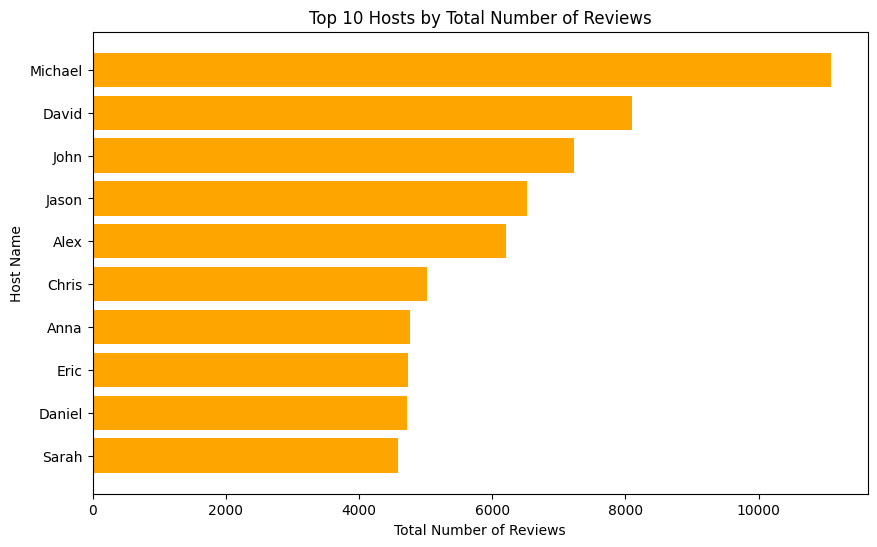

In [ ]:
top_10_reviews = busiest_host_byreview.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_reviews['host_name'], top_10_reviews['number_of_reviews'], color='orange')
plt.xlabel('Total Number of Reviews')
plt.ylabel('Host Name')
plt.title('Top 10 Hosts by Total Number of Reviews')
plt.gca().invert_yaxis()  # Display the largest at the top
plt.show()

**Correlation with Listings and Availability**

In [ ]:
busiest_hostFull=busiest_hosts.merge(host_reviews, on=['host_name'])
busiest_hostFull.head()

,host_name,calculated_host_listings_count,availability_365,number_of_reviews,reviews_per_month
0,Sonder (NYC),67689,288.362319,1281,1.920580
1,Corporate Housing,7189,241.405063,417,0.268101
2,Blueground,6496,271.428571,29,0.215714
3,Jeremy & Laura,5856,297.639344,138,0.119672
4,Kazuya,5253,205.921569,87,0.444706


In [ ]:
# Check correlations between number of reviews and other activity metrics
correlations = busiest_hostFull[['number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()
print(correlations)

                                number_of_reviews  \
number_of_reviews                        1.000000   
calculated_host_listings_count           0.077564   
availability_365                         0.062841   

                                calculated_host_listings_count  \
number_of_reviews                                     0.077564   
calculated_host_listings_count                        1.000000   
availability_365                                      0.028984   

                                availability_365  
number_of_reviews                       0.062841  
calculated_host_listings_count          0.028984  
availability_365                        1.000000  


the output of the correlation shows that their is week correlation between them

Analyze Review Frequency by Location

In [ ]:
location_review=clean_airbnb.groupby(['neighbourhood_group','neighbourhood']).agg({'number_of_reviews':['sum','mean','count']}).reset_index()
location_review.head()

neighbourhood_group neighbourhood number_of_reviews                 
                                                  sum       mean count
0               Bronx      Allerton              1803  48.729730    37
1               Bronx    Baychester               310  51.666667     6
2               Bronx       Belmont               296  14.800000    20
3               Bronx     Bronxdale               458  28.625000    16
4               Bronx   Castle Hill               118  59.000000     2

In [ ]:
#Rename column
location_review.columns = ['neighbourhood_group', 'neighbourhood', 'total_reviews', 'average_reviews', 'listing_count']
location_review.head()

,neighbourhood_group,neighbourhood,total_reviews,average_reviews,listing_count
0,Bronx,Allerton,1803,48.729730,37
1,Bronx,Baychester,310,51.666667,6
2,Bronx,Belmont,296,14.800000,20
3,Bronx,Bronxdale,458,28.625000,16
4,Bronx,Castle Hill,118,59.000000,2


In [ ]:
locationReview_sort=location_review.sort_values(by='total_reviews',ascending=False)
locationReview_sort.head()

,neighbourhood_group,neighbourhood,total_reviews,average_reviews,listing_count
50,Brooklyn,Bedford-Stuyvesant,110352,35.132760,3141
93,Brooklyn,Williamsburg,85427,27.008220,3163
105,Manhattan,Harlem,75927,34.449637,2204
58,Brooklyn,Bushwick,52508,27.038105,1942
106,Manhattan,Hell's Kitchen,49940,32.683246,1528


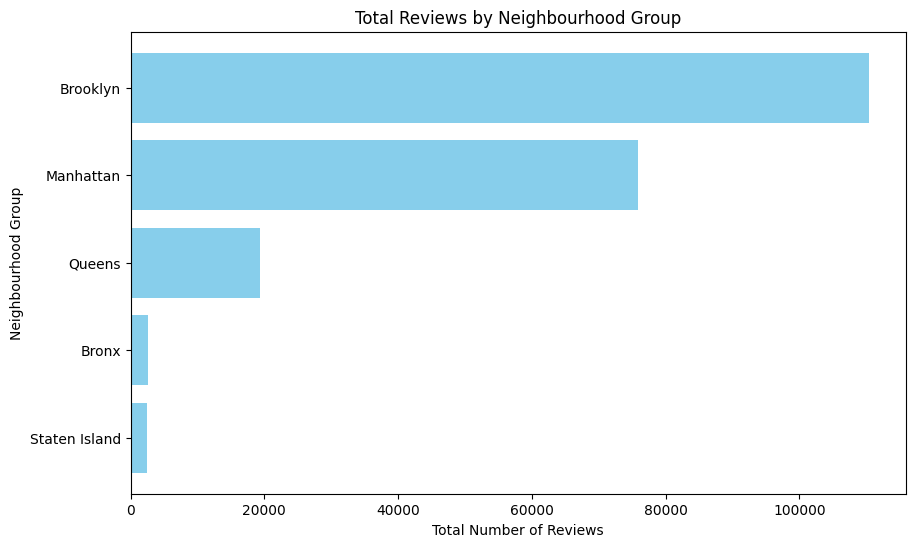

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(locationReview_sort['neighbourhood_group'], locationReview_sort['total_reviews'], color='skyblue')
plt.xlabel('Total Number of Reviews')
plt.ylabel('Neighbourhood Group')
plt.title('Total Reviews by Neighbourhood Group')
plt.gca().invert_yaxis()  # Display largest first
plt.show()

Correlation Between Location and Review Frequency

In [ ]:
airbnb_encode=pd.get_dummies(clean_airbnb, columns=['neighbourhood_group','neighbourhood'])
airbnb_encode.head()

,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,neighbourhood_Westchester Square,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside
0,2539,Clean & quiet apt home by the park,2787,John,40.64749,-73.97237,Private room,149,1,9,...,False,False,False,False,False,False,False,False,False,False
1,2595,Skylit Midtown Castle,2845,Jennifer,40.75362,-73.98377,Entire home/apt,225,1,45,...,False,False,False,False,False,False,False,False,False,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,40.68514,-73.95976,Entire home/apt,89,1,270,...,False,False,False,False,False,False,False,False,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,40.79851,-73.94399,Entire home/apt,80,10,9,...,False,False,False,False,False,False,False,False,False,False
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,40.74767,-73.97500,Entire home/apt,200,3,74,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
airbnb_encode['number_of_reviews'].dtype

dtype('int64')

In [ ]:
# Select only numeric columns for correlation calculation
numeric_cols = airbnb_encode.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric columns
corr_with_reviews = numeric_cols.corr()['number_of_reviews'].sort_values(ascending=False)

# Display correlations
corr_with_reviews


,number_of_reviews
number_of_reviews,1.000000
reviews_per_month,0.549699
availability_365,0.193409
longitude,0.054746
latitude,-0.008559
price,-0.035924
calculated_host_listings_count,-0.059796
minimum_nights,-0.069366
host_id,-0.141973
id,-0.330019
